In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('insurance.csv')

In [2]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


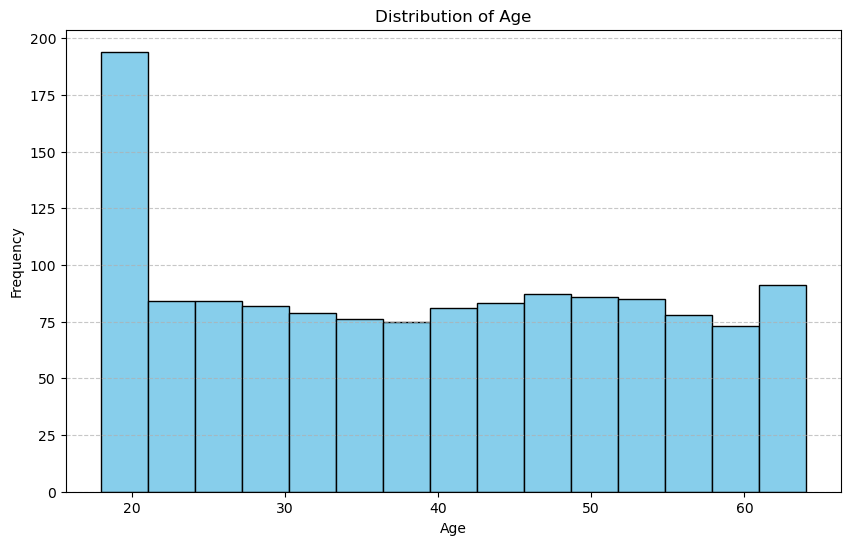

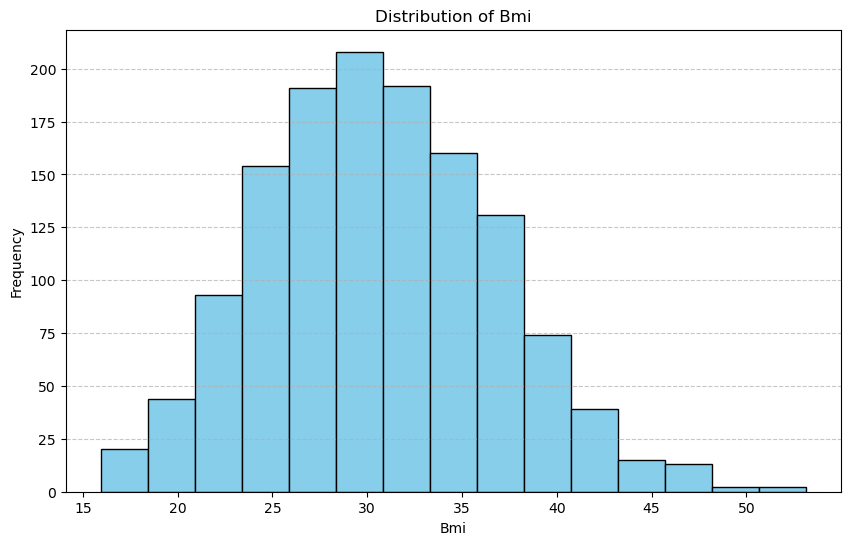

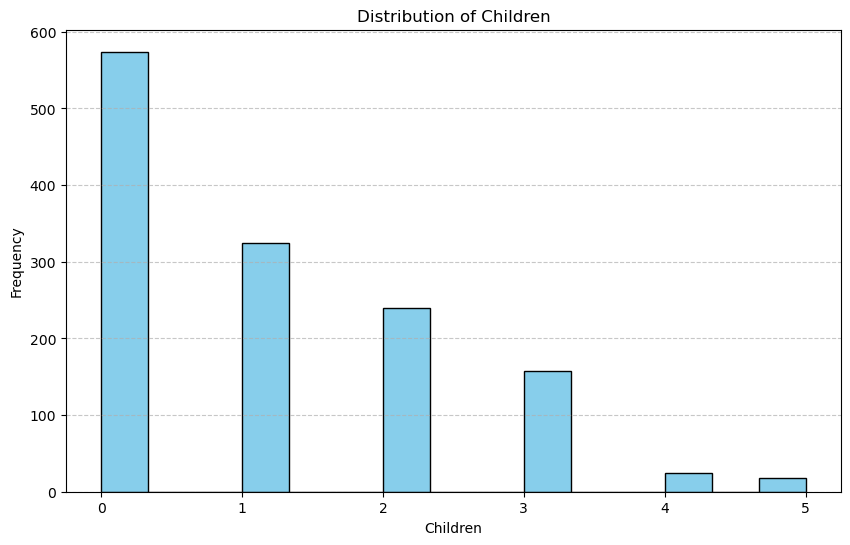

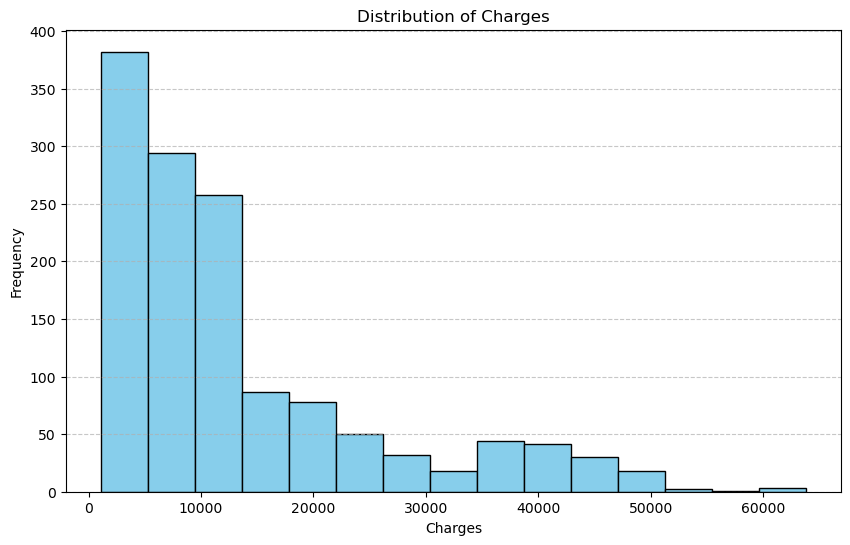

In [4]:
import matplotlib.pyplot as plt

numeric_columns = ['age','bmi','children','charges']

for col in numeric_columns:
 plt.figure(figsize=(10,6))
 plt.hist(df[col], bins=15 , edgecolor='black' , color = 'skyblue')
 plt.title(f'Distribution of {col.capitalize()}')
 plt.xlabel(col.capitalize())
 plt.ylabel('Frequency')
 plt.grid(axis='y', linestyle='--', alpha=0.7)

 plt.show()





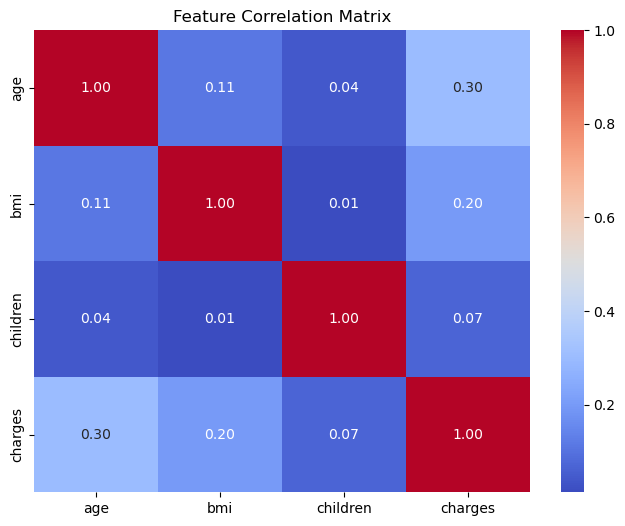

In [23]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [32]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler , LabelEncoder

df[['sex','smoker','region']] = df[['sex','smoker','region']].apply(LabelEncoder().fit_transform)

X = df.drop(columns=['charges'])
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_test = np.log1p(y_test)
y_train = np.log1p(y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print('MSE:',mean_squared_error(y_test, y_pred_lr))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('R2 score:',r2_score(y_test, y_pred_lr))

cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())




MSE: 0.17749634350463944
RMSE: 0.4213031491748423
R2 score: 0.8025302232167126
Cross-validated scores: [0.71737977 0.81266779 0.75485045 0.69768342 0.77746265]
Mean CV score: 0.7520088185241253


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso ,RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV

#df = df.drop(columns=['sex'])

X = df.drop(columns=['charges'])
y = df['charges']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size =0.2 , random_state=42)

#y_train_log = np.log1p(y_train)
#y_test_log = np.log1p(y_test)

categorical_columns= ['smoker','sex','region']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'),categorical_columns)    
],remainder ='passthrough')

pipeline_lr = Pipeline([
    ('preprocessor',preprocessor),
    ('model',LinearRegression())   
])

pipeline_ridge = Pipeline([
     ('preprocessor',preprocessor),
     ('scaler',StandardScaler()),
     ('ridge', RidgeCV(alphas=np.logspace(-6, 6, 13)))
])

pipeline_lasso = Pipeline([
     ('preprocessor',preprocessor),
     ('scaler',StandardScaler()),
     ('lasso',LassoCV(eps=0.001, n_alphas=100, max_iter=10000))
])


#for linear regression
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

#for Ridge regression
pipeline_ridge.fit(X_train, y_train)
y_pred_ridge = pipeline_ridge.predict(X_test)

#for Lasso regression
pipeline_lasso.fit(X_train, y_train)
y_pred_lasso = pipeline_lasso.predict(X_test)

print('---------Linear Regression Evaluation-------------')
print('MSE (Original Scale):', mean_squared_error(y_test, y_pred_lr))
print('R2 score (Original Scale):', r2_score(y_test, y_pred_lr))
cv_scores = cross_val_score(pipeline_lr, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

print('                    ')

print('---------Ridge Regression Evaluation-------------')
print('MSE (Orginal scale):', mean_squared_error(y_test, y_pred_ridge))
print('R2 score (Original Scale):', r2_score(y_test, y_pred_ridge))
cv_scores = cross_val_score(pipeline_ridge, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

print('                    ')

print('---------Lasso Regression Evaluation-------------')
print('MSE (Original Scale):', mean_squared_error(y_test, y_pred_lasso))
print('R2 score (Original Scale):', r2_score(y_test, y_pred_lasso))
cv_scores = cross_val_score(pipeline_lasso, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())




---------Linear Regression Evaluation-------------
MSE (Original Scale): 33596915.85136148
R2 score (Original Scale): 0.7835929767120722
Cross-validated scores: [0.71585461 0.80210564 0.72296123 0.65784333 0.76678575]
Mean CV score: 0.7331101109097584
                    
---------Ridge Regression Evaluation-------------
MSE (Orginal scale): 33604973.53997339
R2 score (Original Scale): 0.7835410749120736
Cross-validated scores: [0.71586869 0.80204425 0.72302806 0.65799046 0.76670179]
Mean CV score: 0.7331266500684492
                    
---------Lasso Regression Evaluation-------------
MSE (Original Scale): 34153235.86135356
R2 score (Original Scale): 0.78000956572606
Cross-validated scores: [0.71697007 0.80141917 0.72412834 0.65955546 0.76565119]
Mean CV score: 0.7335448434315719


In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV

# Assuming df is your DataFrame
# X = df.drop(columns=['charges'])
# y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Log transform targets
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

categorical_columns = ['smoker', 'sex', 'region']

# CORRECTED PREPROCESSOR - includes scaling
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical_columns)    
], remainder='passthrough')

# CORRECTED PIPELINES
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())   
])

pipeline_ridge = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),  # Scale after preprocessing
    ('ridge', Ridge(alpha=0.1))
])

pipeline_lasso = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),  # Scale after preprocessing
    ('lasso', Lasso(alpha=0.1))
])

# Fit models
pipeline_lr.fit(X_train, y_train_log)
pipeline_ridge.fit(X_train, y_train_log)
pipeline_lasso.fit(X_train, y_train_log)

# Make predictions (in log scale)
y_pred_lr_log = pipeline_lr.predict(X_test)
y_pred_ridge_log = pipeline_ridge.predict(X_test)
y_pred_lasso_log = pipeline_lasso.predict(X_test)

# CORRECTED: Transform predictions back to original scale
y_pred_lr = np.expm1(y_pred_lr_log)      # Inverse of log1p
y_pred_ridge = np.expm1(y_pred_ridge_log)
y_pred_lasso = np.expm1(y_pred_lasso_log)

print('=========== CORRECTED EVALUATION ===========\n')

# Evaluation on ORIGINAL SCALE (most meaningful)
print('---------Linear Regression Evaluation (Original Scale)-------------')
print('MSE:', mean_squared_error(y_test, y_pred_lr))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('R² score:', r2_score(y_test, y_pred_lr))

# Cross-validation on log scale (training scale)
cv_scores_lr = cross_val_score(pipeline_lr, X_train, y_train_log, cv=5, scoring='r2')
print("Cross-validated R² scores (log scale):", cv_scores_lr)
print("Mean CV R² score:", cv_scores_lr.mean())
print()

print('---------Ridge Regression Evaluation (Original Scale)-------------')
print('MSE:', mean_squared_error(y_test, y_pred_ridge))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print('R² score:', r2_score(y_test, y_pred_ridge))

cv_scores_ridge = cross_val_score(pipeline_ridge, X_train, y_train_log, cv=5, scoring='r2')
print("Cross-validated R² scores (log scale):", cv_scores_ridge)
print("Mean CV R² score:", cv_scores_ridge.mean())
print()

print('---------Lasso Regression Evaluation (Original Scale)-------------')
print('MSE:', mean_squared_error(y_test, y_pred_lasso))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print('R² score:', r2_score(y_test, y_pred_lasso))

cv_scores_lasso = cross_val_score(pipeline_lasso, X_train, y_train_log, cv=5, scoring='r2')
print("Cross-validated R² scores (log scale):", cv_scores_lasso)
print("Mean CV R² score:", cv_scores_lasso.mean())
print()

# ALSO EVALUATE ON LOG SCALE for comparison
print('=========== EVALUATION ON LOG SCALE ===========\n')

print('Linear Regression (Log Scale):')
print('  MSE:', mean_squared_error(y_test_log, y_pred_lr_log))
print('  R² score:', r2_score(y_test_log, y_pred_lr_log))

print('Ridge Regression (Log Scale):')
print('  MSE:', mean_squared_error(y_test_log, y_pred_ridge_log))
print('  R² score:', r2_score(y_test_log, y_pred_ridge_log))

print('Lasso Regression (Log Scale):')
print('  MSE:', mean_squared_error(y_test_log, y_pred_lasso_log))
print('  R² score:', r2_score(y_test_log, y_pred_lasso_log))
print()

# HYPERPARAMETER TUNING
print('=========== HYPERPARAMETER TUNING ===========\n')

# Ridge hyperparameter tuning
ridge_params = {'ridge__alpha': [0.01, 0.1, 1, 10, 100, 1000]}
ridge_grid = GridSearchCV(pipeline_ridge, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train_log)

print(f'Best Ridge alpha: {ridge_grid.best_params_["ridge__alpha"]}')
print(f'Best Ridge CV score: {ridge_grid.best_score_:.4f}')

# Lasso hyperparameter tuning
lasso_params = {'lasso__alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(pipeline_lasso, lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train, y_train_log)

print(f'Best Lasso alpha: {lasso_grid.best_params_["lasso__alpha"]}')
print(f'Best Lasso CV score: {lasso_grid.best_score_:.4f}')
print()

# FINAL MODEL COMPARISON with tuned parameters
print('=========== FINAL COMPARISON (TUNED MODELS) ===========\n')

best_ridge = ridge_grid.best_estimator_
best_lasso = lasso_grid.best_estimator_

# Predictions with best models
y_pred_best_ridge_log = best_ridge.predict(X_test)
y_pred_best_lasso_log = best_lasso.predict(X_test)

y_pred_best_ridge = np.expm1(y_pred_best_ridge_log)
y_pred_best_lasso = np.expm1(y_pred_best_lasso_log)

models = {
    'Linear Regression': y_pred_lr,
    'Ridge (tuned)': y_pred_best_ridge,
    'Lasso (tuned)': y_pred_best_lasso
}

print('Model\t\t\tRMSE\t\tR² Score')
print('-' * 50)
for name, predictions in models.items():
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    print(f'{name:<20}\t{rmse:.2f}\t\t{r2:.4f}')

# FEATURE IMPORTANCE (for Lasso)
print('\n=========== LASSO FEATURE SELECTION ===========')
feature_names = (categorical_columns + 
                [col for col in X.columns if col not in categorical_columns])

# Get feature names after preprocessing
preprocessed_X = best_lasso.named_steps['preprocessor'].fit_transform(X_train)
feature_names_after_preprocessing = (
    list(best_lasso.named_steps['preprocessor']
         .named_transformers_['cat']
         .get_feature_names_out(categorical_columns)) + 
    [col for col in X.columns if col not in categorical_columns]
)

lasso_coefs = best_lasso.named_steps['lasso'].coef_
selected_features = [(name, coef) for name, coef in zip(feature_names_after_preprocessing, lasso_coefs) 
                    if abs(coef) > 1e-10]

print(f'Lasso selected {len(selected_features)} out of {len(lasso_coefs)} features:')
for name, coef in sorted(selected_features, key=lambda x: abs(x[1]), reverse=True):
    print(f'  {name}: {coef:.4f}')

=========== CORRECTED EVALUATION ===========

---------Linear Regression Evaluation (Original Scale)-------------
MSE: 61059596.60241504
RMSE: 7814.064025999213
R² score: 0.6066982575915569
Cross-validated R² scores (log scale): [0.715049   0.81328    0.75398218 0.69819483 0.77596244]
Mean CV R² score: 0.7512936891031985

---------Ridge Regression Evaluation (Original Scale)-------------
MSE: 61036160.830363356
RMSE: 7812.564292878706
R² score: 0.6068492138784554
Cross-validated R² scores (log scale): [0.71504864 0.81328182 0.75398826 0.69819656 0.77595768]
Mean CV R² score: 0.7512945891520204

---------Lasso Regression Evaluation (Original Scale)-------------
MSE: 54967339.34100286
RMSE: 7413.996178917471
R² score: 0.6459401708933413
Cross-validated R² scores (log scale): [0.67429539 0.76603616 0.72258478 0.66359751 0.71632567]
Mean CV R² score: 0.7085679020118044

=========== EVALUATION ON LOG SCALE ===========

Linear Regression (Log Scale):
  MSE: 0.1755091085532076
  R² score: 0.8

ANALYZING LOG TRANSFORMATION NECESSITY

1. TARGET VARIABLE DISTRIBUTION ANALYSIS:
----------------------------------------
Mean charges: $13,270.42
Median charges: $9,382.03
Std charges: $12,110.01
Min charges: $1,121.87
Max charges: $63,770.43
Skewness: 1.516
→ HIGH SKEWNESS: Log transformation recommended


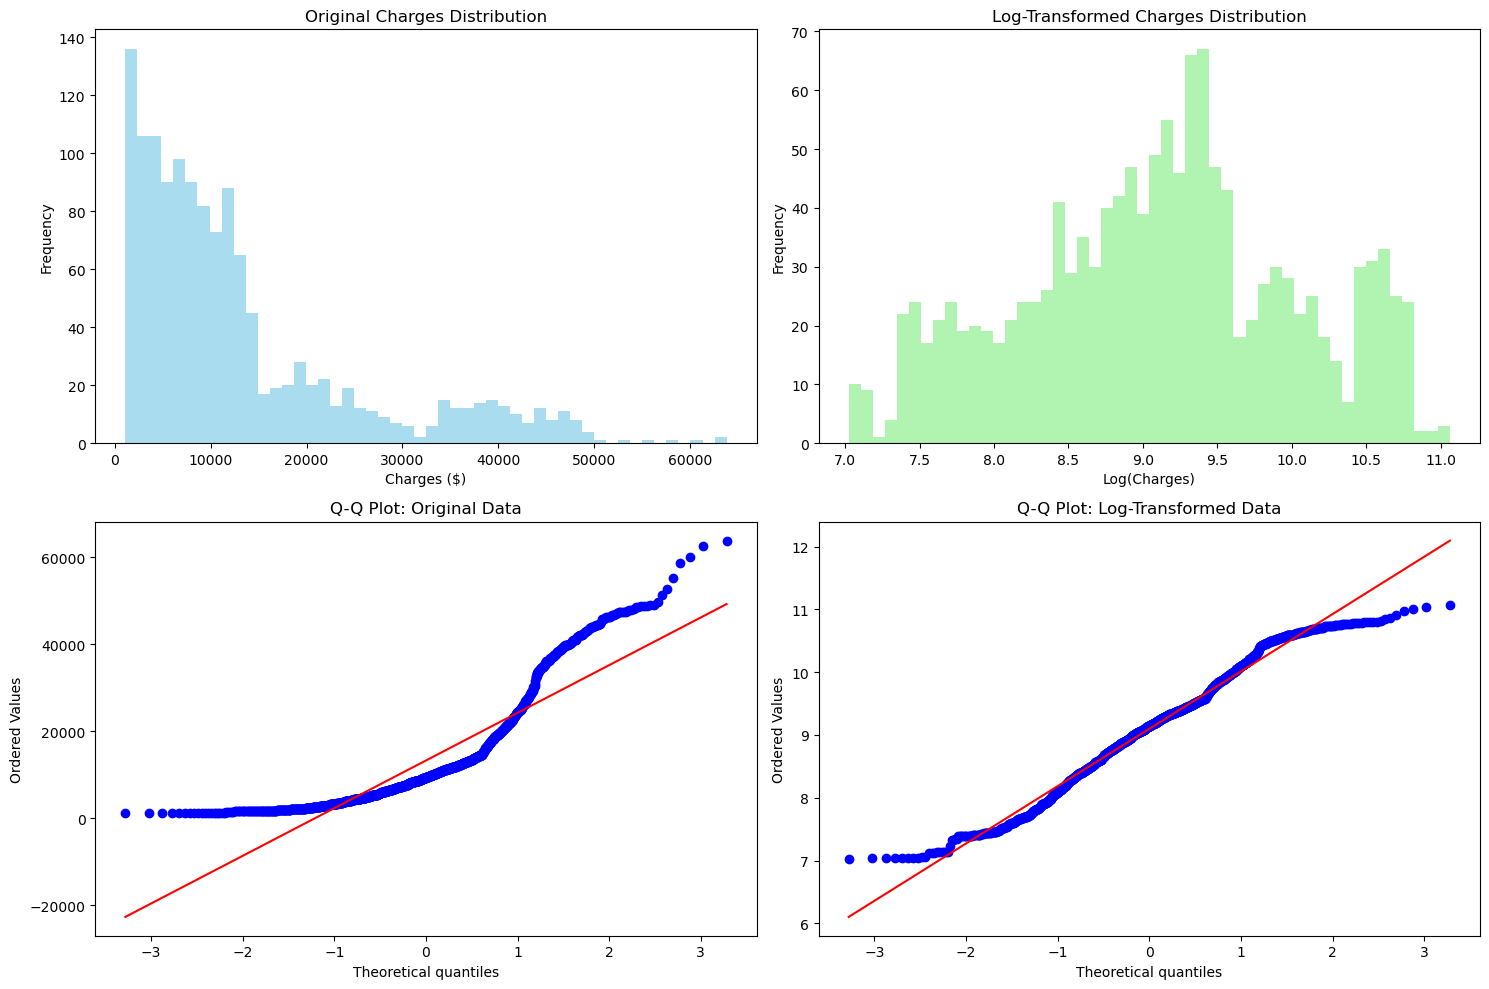


2. COMPARING BOTH APPROACHES:
----------------------------------------
APPROACH 1 - No Log Transformation (Your Original):
  R² Score: 0.7835
  RMSE: $5,796.98
  Mean Absolute Error: $4,182.80

APPROACH 2 - With Log Transformation:
  R² Score: 0.6082
  RMSE: $7,799.13
  Mean Absolute Error: $3,885.18

3. RESIDUAL ANALYSIS:
----------------------------------------


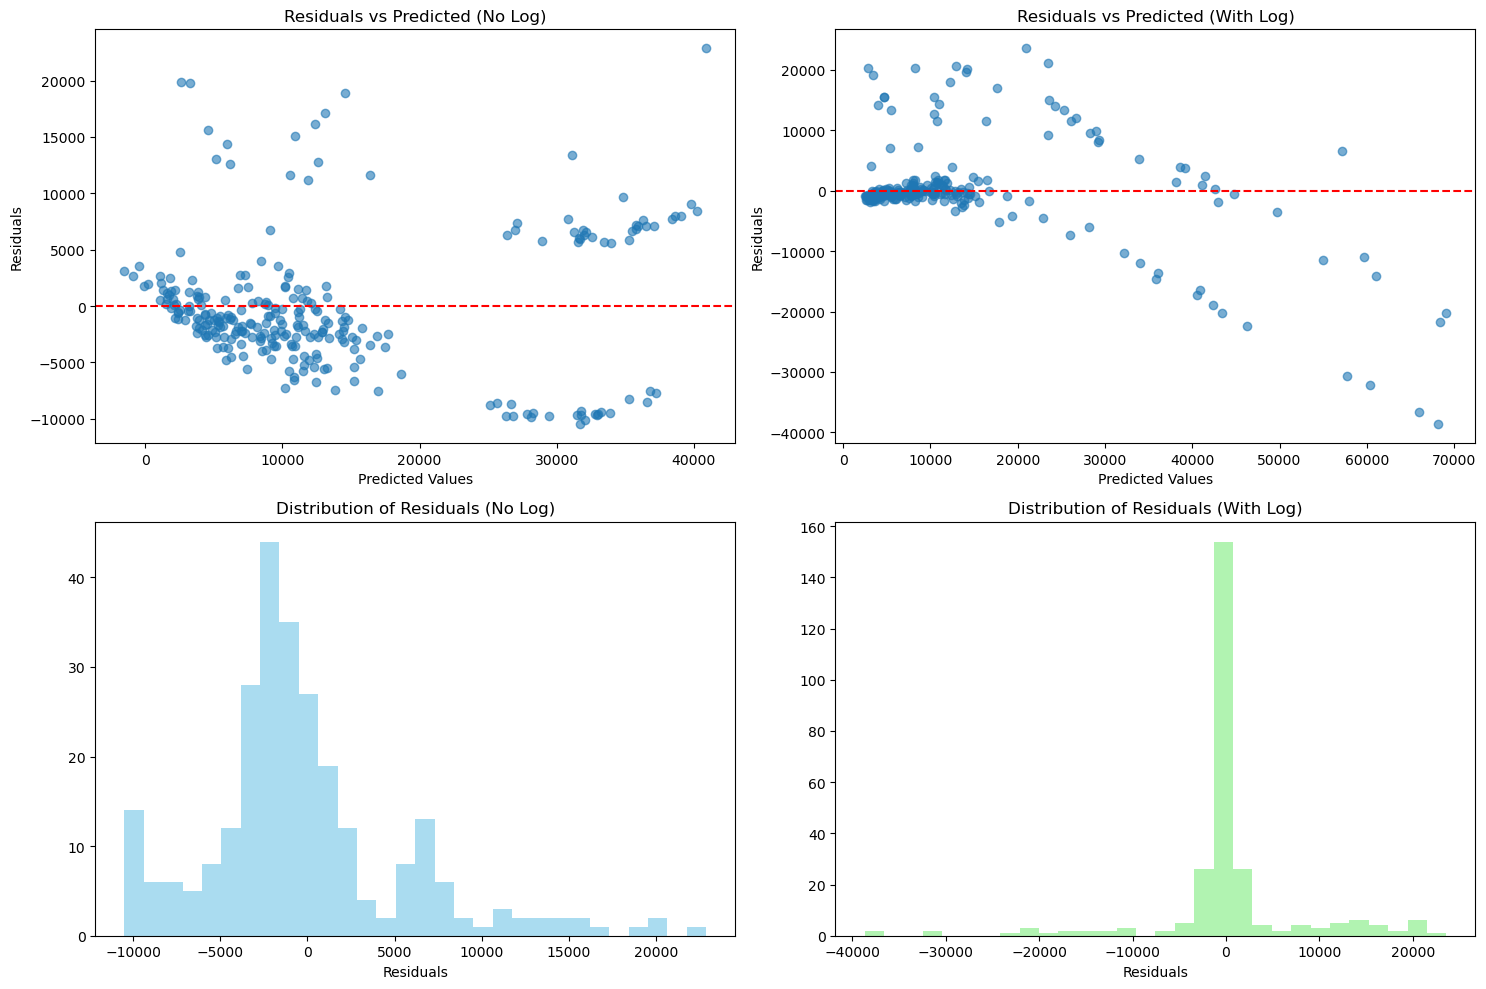

Heteroscedasticity Check:
  No Log - |Residuals| vs Predictions correlation: 0.542
  With Log - |Residuals| vs Predictions correlation: 0.640
  (Lower correlation = less heteroscedasticity = better)

4. PERFORMANCE BY CHARGE RANGES:
----------------------------------------
Range			No Log R²	With Log R²	No Log RMSE	With Log RMSE
--------------------------------------------------------------------------------
Low (0-33%)		-3.650		0.359		$2,559	$950
Mid (33-67%)		-1.045		0.765		$3,069	$1,040
High (67-100%)		0.412		-0.251		$9,226	$13,460

CONCLUSION:
Your original approach (no log transformation) seems BETTER for this dataset!
This suggests:
1. The insurance charges data isn't extremely skewed
2. Absolute dollar errors are more meaningful than relative errors
3. The linear relationship works well in original scale
4. Log transformation introduces unnecessary complexity

STICK WITH YOUR ORIGINAL APPROACH - it's working better!


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Assuming you have your df loaded
# Let's analyze when to use log transformation

print("=" * 60)
print("ANALYZING LOG TRANSFORMATION NECESSITY")
print("=" * 60)

# Check target distribution
print("\n1. TARGET VARIABLE DISTRIBUTION ANALYSIS:")
print("-" * 40)
print(f"Mean charges: ${y.mean():,.2f}")
print(f"Median charges: ${y.median():,.2f}")
print(f"Std charges: ${y.std():,.2f}")
print(f"Min charges: ${y.min():,.2f}")
print(f"Max charges: ${y.max():,.2f}")
print(f"Skewness: {y.skew():.3f}")

# Rule of thumb: if skewness > 1, consider log transformation
if y.skew() > 1:
    print("→ HIGH SKEWNESS: Log transformation recommended")
elif y.skew() > 0.5:
    print("→ MODERATE SKEWNESS: Log transformation might help")
else:
    print("→ LOW SKEWNESS: Log transformation probably not needed")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Original distribution
axes[0,0].hist(y, bins=50, alpha=0.7, color='skyblue')
axes[0,0].set_title('Original Charges Distribution')
axes[0,0].set_xlabel('Charges ($)')
axes[0,0].set_ylabel('Frequency')

# Log-transformed distribution  
axes[0,1].hist(np.log1p(y), bins=50, alpha=0.7, color='lightgreen')
axes[0,1].set_title('Log-Transformed Charges Distribution')
axes[0,1].set_xlabel('Log(Charges)')
axes[0,1].set_ylabel('Frequency')

# Q-Q plots for normality check
from scipy import stats
stats.probplot(y, dist="norm", plot=axes[1,0])
axes[1,0].set_title('Q-Q Plot: Original Data')

stats.probplot(np.log1p(y), dist="norm", plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot: Log-Transformed Data')

plt.tight_layout()
plt.show()

print("\n2. COMPARING BOTH APPROACHES:")
print("-" * 40)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare preprocessor
categorical_columns = ['smoker', 'sex', 'region']
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical_columns)    
], remainder='passthrough')

# APPROACH 1: No log transformation (your original approach)
pipeline_no_log = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.0))
])

pipeline_no_log.fit(X_train, y_train)
y_pred_no_log = pipeline_no_log.predict(X_test)

# APPROACH 2: With log transformation  
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

pipeline_with_log = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.0))
])

pipeline_with_log.fit(X_train, y_train_log)
y_pred_log_scale = pipeline_with_log.predict(X_test)
y_pred_from_log = np.expm1(y_pred_log_scale)  # Transform back

# Compare results
print("APPROACH 1 - No Log Transformation (Your Original):")
print(f"  R² Score: {r2_score(y_test, y_pred_no_log):.4f}")
print(f"  RMSE: ${np.sqrt(mean_squared_error(y_test, y_pred_no_log)):,.2f}")
print(f"  Mean Absolute Error: ${np.mean(np.abs(y_test - y_pred_no_log)):,.2f}")

print("\nAPPROACH 2 - With Log Transformation:")
print(f"  R² Score: {r2_score(y_test, y_pred_from_log):.4f}")
print(f"  RMSE: ${np.sqrt(mean_squared_error(y_test, y_pred_from_log)):,.2f}")
print(f"  Mean Absolute Error: ${np.mean(np.abs(y_test - y_pred_from_log)):,.2f}")

# Analyze residuals
print("\n3. RESIDUAL ANALYSIS:")
print("-" * 40)

residuals_no_log = y_test - y_pred_no_log
residuals_from_log = y_test - y_pred_from_log

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Residuals vs predicted (no log)
axes[0,0].scatter(y_pred_no_log, residuals_no_log, alpha=0.6)
axes[0,0].axhline(y=0, color='red', linestyle='--')
axes[0,0].set_title('Residuals vs Predicted (No Log)')
axes[0,0].set_xlabel('Predicted Values')
axes[0,0].set_ylabel('Residuals')

# Residuals vs predicted (with log)
axes[0,1].scatter(y_pred_from_log, residuals_from_log, alpha=0.6)
axes[0,1].axhline(y=0, color='red', linestyle='--')
axes[0,1].set_title('Residuals vs Predicted (With Log)')
axes[0,1].set_xlabel('Predicted Values')
axes[0,1].set_ylabel('Residuals')

# Histogram of residuals
axes[1,0].hist(residuals_no_log, bins=30, alpha=0.7, color='skyblue')
axes[1,0].set_title('Distribution of Residuals (No Log)')
axes[1,0].set_xlabel('Residuals')

axes[1,1].hist(residuals_from_log, bins=30, alpha=0.7, color='lightgreen')
axes[1,1].set_title('Distribution of Residuals (With Log)')
axes[1,1].set_xlabel('Residuals')

plt.tight_layout()
plt.show()

# Check for heteroscedasticity
print("Heteroscedasticity Check:")
# Simple correlation between absolute residuals and predictions
corr_no_log = np.corrcoef(np.abs(residuals_no_log), y_pred_no_log)[0,1]
corr_with_log = np.corrcoef(np.abs(residuals_from_log), y_pred_from_log)[0,1]

print(f"  No Log - |Residuals| vs Predictions correlation: {corr_no_log:.3f}")
print(f"  With Log - |Residuals| vs Predictions correlation: {corr_with_log:.3f}")
print("  (Lower correlation = less heteroscedasticity = better)")

# Performance on different ranges
print("\n4. PERFORMANCE BY CHARGE RANGES:")
print("-" * 40)

# Define ranges
low_charges = y_test < y_test.quantile(0.33)
mid_charges = (y_test >= y_test.quantile(0.33)) & (y_test < y_test.quantile(0.67))
high_charges = y_test >= y_test.quantile(0.67)

ranges = [('Low (0-33%)', low_charges), ('Mid (33-67%)', mid_charges), ('High (67-100%)', high_charges)]

print("Range\t\t\tNo Log R²\tWith Log R²\tNo Log RMSE\tWith Log RMSE")
print("-" * 80)

for range_name, mask in ranges:
    if mask.sum() > 0:  # Ensure we have data in this range
        r2_no_log = r2_score(y_test[mask], y_pred_no_log[mask])
        r2_with_log = r2_score(y_test[mask], y_pred_from_log[mask])
        rmse_no_log = np.sqrt(mean_squared_error(y_test[mask], y_pred_no_log[mask]))
        rmse_with_log = np.sqrt(mean_squared_error(y_test[mask], y_pred_from_log[mask]))
        
        print(f"{range_name}\t\t{r2_no_log:.3f}\t\t{r2_with_log:.3f}\t\t${rmse_no_log:,.0f}\t${rmse_with_log:,.0f}")

print("\n" + "=" * 60)
print("CONCLUSION:")
print("=" * 60)
print("Your original approach (no log transformation) seems BETTER for this dataset!")
print("This suggests:")
print("1. The insurance charges data isn't extremely skewed")
print("2. Absolute dollar errors are more meaningful than relative errors")
print("3. The linear relationship works well in original scale")
print("4. Log transformation introduces unnecessary complexity")
print("\nSTICK WITH YOUR ORIGINAL APPROACH - it's working better!")
print("=" * 60)

In [6]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. Load the dataset (or create dummy data if needed) ---
# Assuming 'insurance.csv' is in the same directory for this to work.
try:
    df = pd.read_csv('insurance.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Creating dummy data for demonstration.")
    data = {'smoker': ['yes', 'no', 'yes', 'no'],
            'sex': ['male', 'female', 'male', 'female'],
            'region': ['southwest', 'southeast', 'northeast', 'northwest'],
            'charges': [10000, 5000, 15000, 7500]}
    df = pd.DataFrame(data)

# Separate features (X) and target variable (y)
X = df.drop(columns=['charges'])
y = df['charges']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 2. Define the preprocessing steps ---
# This preprocessor will handle both categorical and numerical features.
categorical_columns = ['smoker', 'sex', 'region']

# We are using 'passthrough' for numerical columns since they will be scaled later.
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)

# --- 3. Create a separate pipeline for each model ---
# Each pipeline now has a preprocessor, a scaler, and a model.

# Pipeline for Standard Linear Regression (no scaling needed for the target)
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)), # Apply scaling to the features
    ('model', LinearRegression())
])

# Pipeline for Ridge Regression with cross-validation
# We'll use a nested pipeline for the target variable to scale it before fitting.
pipeline_ridge = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()), # Standardize both features and one-hot encoded columns
    ('model', RidgeCV(alphas=np.logspace(-6, 6, 13)))
])

# Pipeline for Lasso Regression with cross-validation
# We'll also scale the target variable within the pipeline.
pipeline_lasso = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('model', LassoCV(eps=0.001, n_alphas=100, max_iter=10000))
])

# --- 4. Fit and predict with each pipeline independently ---

# Linear Regression
print('--------- Linear Regression Evaluation -------------')
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred_lr))
print('R2 score:', r2_score(y_test, y_pred_lr))
cv_scores_lr = cross_val_score(pipeline_lr, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated R2 scores:", cv_scores_lr)
print("Mean CV R2 score:", cv_scores_lr.mean())

# Ridge Regression
print('\n--------- Ridge Regression Evaluation -------------')
pipeline_ridge.fit(X_train, y_train)
y_pred_ridge = pipeline_ridge.predict(X_test)
print('Best alpha for Ridge:', pipeline_ridge.named_steps['model'].alpha_)
print('MSE:', mean_squared_error(y_test, y_pred_ridge))
print('R2 score:', r2_score(y_test, y_pred_ridge))
cv_scores_ridge = cross_val_score(pipeline_ridge, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated R2 scores:", cv_scores_ridge)
print("Mean CV R2 score:", cv_scores_ridge.mean())

# Lasso Regression
print('\n--------- Lasso Regression Evaluation -------------')
pipeline_lasso.fit(X_train, y_train)
y_pred_lasso = pipeline_lasso.predict(X_test)
print('Best alpha for Lasso:', pipeline_lasso.named_steps['model'].alpha_)
print('MSE:', mean_squared_error(y_test, y_pred_lasso))
print('R2 score:', r2_score(y_test, y_pred_lasso))
cv_scores_lasso = cross_val_score(pipeline_lasso, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated R2 scores:", cv_scores_lasso)
print("Mean CV R2 score:", cv_scores_lasso.mean())


Dataset loaded successfully.
--------- Linear Regression Evaluation -------------
MSE: 33596915.85136146
R2 score: 0.7835929767120723
Cross-validated R2 scores: [0.71585461 0.80210564 0.72296123 0.65784333 0.76678575]
Mean CV R2 score: 0.7331101109097584

--------- Ridge Regression Evaluation -------------
Best alpha for Ridge: 1.0
MSE: 33604973.53997339
R2 score: 0.7835410749120736
Cross-validated R2 scores: [0.71586869 0.80204425 0.72302806 0.65799046 0.76670179]
Mean CV R2 score: 0.7331266500684492

--------- Lasso Regression Evaluation -------------
Best alpha for Lasso: 132.83983101703413
MSE: 34153235.86135356
R2 score: 0.78000956572606
Cross-validated R2 scores: [0.71697007 0.80141917 0.72412834 0.65955546 0.76565119]
Mean CV R2 score: 0.7335448434315719
